In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import shap

In [4]:
df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\Do_an_cuoiky\\datasets\\Heart_Attack\\Heart Attack.csv')
# df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\decision_tree\\heart_disease\\heart\\heart.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
df.shape

(1319, 9)

- chuyển lớp class thành số

In [6]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['class'])
 
label

array([0, 1, 0, ..., 1, 1, 1])

In [7]:
# removing the column 'class' from df
# as it is of no use now.
df.drop("class", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'class'
df["class"] = label
 
# printing Dataframe
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [49]:
feature_names = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
X = df.drop(columns= ['class']).values
y = df['class'].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Sử dụng RandomOverSampler để cân bằng dữ liệu ở lớp class

In [37]:
from imblearn.over_sampling import RandomOverSampler
X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)

- Standardization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X.shape

(1319, 8)

- Tìm ra số thành phần cần giữ lại để dùng PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = 0
n_components_to_retain = 0

for i, ratio in enumerate(explained_variance_ratio):
    cumulative_variance += ratio
    if cumulative_variance >= 0.95:  # Hoặc sử dụng giá trị mong muốn của bạn
        n_components_to_retain = i + 1
        break
    
print("Number of components to retain:", n_components_to_retain)


Number of components to retain: 4


- PCA

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X = pca.fit_transform(X)
X.shape


(1319, 4)

In [42]:
sum(y_train == 0)

647

In [43]:
sum(y_train == 1)


647

## SVM

In [200]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [201]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred))
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("recall_score: ", metrics.recall_score(y_test, y_pred))
print("precision_score: ", metrics.precision_score(y_test, y_pred))

confusion_matrix: 
 [[ 98   3]
 [ 52 111]]
accuracy_score:  0.7916666666666666
f1_score:  0.8014440433212996
recall_score:  0.6809815950920245
precision_score:  0.9736842105263158


- Dùng Shap để chọn feature importance 

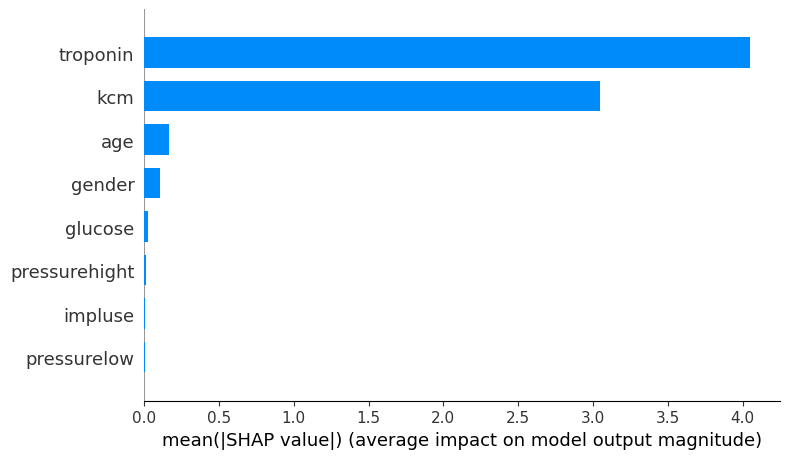

In [202]:
# Use the KernelExplainer for SVM
explainer = shap.Explainer(svm, X_train)
shap_values = explainer.shap_values(X_train)

# Plot the summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names = feature_names)

- Train lại

In [203]:
X_svm = df.drop(columns= ['class', 'glucose', 'impluse', 'pressurelow', 'pressurehight']).values

In [204]:
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y, test_size=0.2, random_state=42)

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')


In [207]:
from sklearn import svm
svm_shap = svm.SVC(kernel='linear', C=100, probability=True)
svm_shap.fit(X_svm_train, y_svm_train)
y_pred_shap = svm_shap.predict(X_svm_test)

In [208]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_svm_test, y_pred_shap))
print("accuracy_score: ", metrics.accuracy_score(y_svm_test, y_pred_shap))
print("f1_score: ", metrics.f1_score(y_svm_test, y_pred_shap))
print("recall_score: ", metrics.recall_score(y_svm_test, y_pred_shap))
print("precision_score: ", metrics.precision_score(y_svm_test, y_pred_shap))

confusion_matrix: 
 [[ 92   9]
 [  9 154]]
accuracy_score:  0.9318181818181818
f1_score:  0.9447852760736196
recall_score:  0.9447852760736196
precision_score:  0.9447852760736196


## MLP

In [109]:
from sklearn.neural_network import MLPClassifier


- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [185]:
# Thiết lập lưới tìm kiếm
param_grid_mlp = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                  'alpha': [0.001, 0.01, 0.1]}

# Tạo mô hình MLP
mlp = MLPClassifier(max_iter=500)

# Tìm kiếm trên lưới
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# In kết quả
print("Best parameters for MLP:", grid_search_mlp.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_mlp = grid_search_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy on test set:", accuracy_mlp)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Best parameters for MLP: {'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50)}
Accuracy on test set: 0.8409090909090909


In [186]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), alpha=0.1)
# mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [187]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_mlp))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_mlp))
print("f1_score: ", metrics.f1_score(y_test, y_pred_mlp))
print("recall_score: ", metrics.recall_score(y_test, y_pred_mlp))
print("precision_score: ", metrics.precision_score(y_test, y_pred_mlp))


confusion_matrix: 
 [[ 74  27]
 [ 12 151]]
accuracy_score:  0.8522727272727273
f1_score:  0.8856304985337243
recall_score:  0.9263803680981595
precision_score:  0.848314606741573


- Dùng shap để chọn features importance

ExactExplainer explainer: 1295it [01:17, 14.39it/s]                          


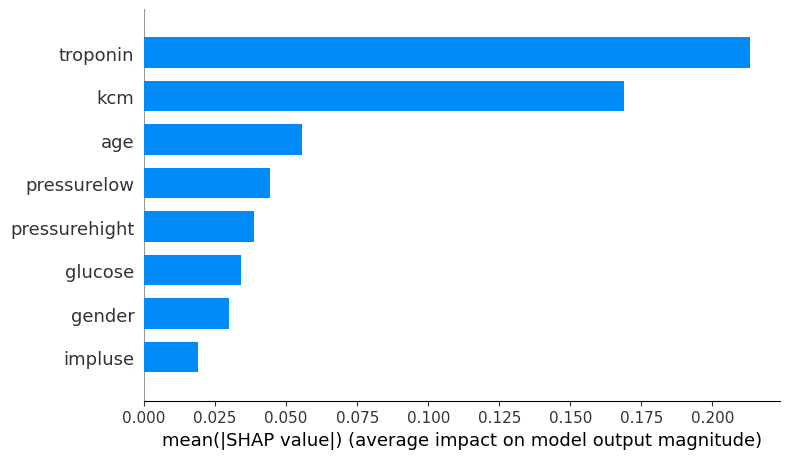

In [188]:
# Define a function for predictions
def predict_fn(x):
    return mlp.predict_proba(x)[:, 1]  # Assuming it's a binary classification task

# Use the KernelExplainer for MLPClassifier
explainer = shap.Explainer(predict_fn, X_train)
shap_values = explainer(X_train)

# Plot the summary plot
shap.summary_plot(shap_values.values, X_train, plot_type="bar", feature_names=feature_names)

## Logistic_regression

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=100, ).fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)

In [178]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_lgr))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_lgr))
print("f1_score: ", metrics.f1_score(y_test, y_pred_lgr))
print("recall_score: ", metrics.recall_score(y_test, y_pred_lgr))
print("precision_score: ", metrics.precision_score(y_test, y_pred_lgr))


confusion_matrix: 
 [[ 92   9]
 [ 26 137]]
accuracy_score:  0.8674242424242424
f1_score:  0.8867313915857605
recall_score:  0.8404907975460123
precision_score:  0.9383561643835616


- Dùng Shap để chọn feature importance 

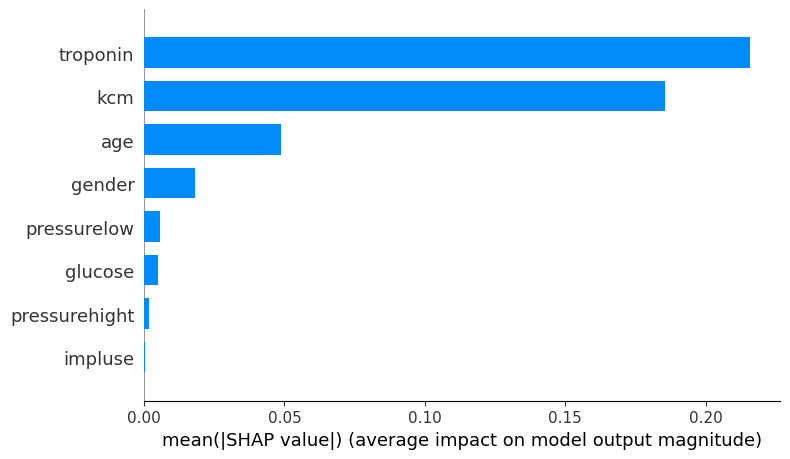

In [179]:
# Define a function for predictions
def predict_fn(x):
    return lgr.predict_proba(x)[:, 1]  # Assuming it's a binary classification task

# Use the KernelExplainer for Logistic Regression
explainer = shap.Explainer(predict_fn, X_train)
shap_values = explainer(X_train)

# Plot the summary plot
shap.summary_plot(shap_values.values, X_train, plot_type="bar", feature_names=feature_names)

- Chọn các feature importance để train lại

In [180]:
X_lgr = df.drop(columns= ['class', 'pressurehight', 'impluse']).values

In [181]:
X_lgr_train, X_lgr_test, y_lgr_train, y_lgr_test = train_test_split(X_lgr, y, test_size=0.2, random_state=42)

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [182]:
# Thiết lập lưới tìm kiếm
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Tạo mô hình Logistic Regression
logistic_regression = LogisticRegression()

# Tìm kiếm trên lưới
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# In kết quả
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy on test set:", accuracy_lr)

Best parameters for Logistic Regression: {'C': 100}
Accuracy on test set: 0.8674242424242424


In [183]:
from sklearn.linear_model import LogisticRegression
lgr_shap = LogisticRegression(C=100, ).fit(X_lgr_train, y_lgr_train)
y_pred_lgr_shap = lgr_shap.predict(X_lgr_test)

In [184]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_lgr_test, y_pred_lgr_shap))
print("accuracy_score: ", metrics.accuracy_score(y_lgr_test, y_pred_lgr_shap))
print("f1_score: ", metrics.f1_score(y_lgr_test, y_pred_lgr_shap))
print("recall_score: ", metrics.recall_score(y_lgr_test, y_pred_lgr_shap))
print("precision_score: ", metrics.precision_score(y_lgr_test, y_pred_lgr_shap))

confusion_matrix: 
 [[ 85  16]
 [ 15 148]]
accuracy_score:  0.8825757575757576
f1_score:  0.9051987767584098
recall_score:  0.9079754601226994
precision_score:  0.9024390243902439


## Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [166]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_dt))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_dt))
print("f1_score: ", metrics.f1_score(y_test, y_pred_dt))
print("recall_score: ", metrics.recall_score(y_test, y_pred_dt))
print("precision_score: ", metrics.precision_score(y_test, y_pred_dt))


confusion_matrix: 
 [[ 98   3]
 [  3 160]]
accuracy_score:  0.9772727272727273
f1_score:  0.98159509202454
recall_score:  0.9815950920245399
precision_score:  0.9815950920245399


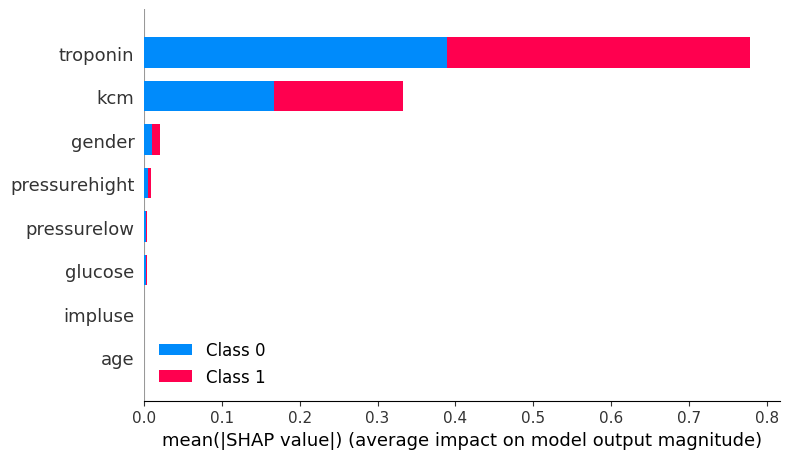

In [167]:
# Use the KernelExplainer for SVM
explainer = shap.Explainer(dt)
shap_values = explainer.shap_values(X_train)

# Plot the summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)

In [168]:
X_dt = df.drop(columns= ['class', 'impluse', 'age', 'pressurelow']).values

In [169]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y, test_size=0.2, random_state=42)

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [170]:
# Thiết lập lưới tìm kiếm
param_grid_dt = {'max_depth': [3, 4, 5, 6, 7, None],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'ccp_alpha': [0.001, 0.01, 0.1, 1.0],
                 'criterion': ['entropy', 'gini']}

# Tạo mô hình Decision Tree
dt = DecisionTreeClassifier()

# Tìm kiếm trên lưới
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# In kết quả
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_dt = grid_search_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy on test set:", accuracy_dt)

Best parameters for Decision Tree: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on test set: 0.9810606060606061


In [173]:
dt_shap = DecisionTreeClassifier(ccp_alpha=0.001, max_depth = 4, min_samples_leaf=1, min_samples_split=2, criterion='entropy').fit(X_dt_train, y_dt_train)
y_pred_dt_shap = dt_shap.predict(X_dt_test)

In [174]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_dt_test, y_pred_dt_shap))
print("accuracy_score: ", metrics.accuracy_score(y_dt_test, y_pred_dt_shap))
print("f1_score: ", metrics.f1_score(y_dt_test, y_pred_dt_shap))
print("recall_score: ", metrics.recall_score(y_dt_test, y_pred_dt_shap))
print("precision_score: ", metrics.precision_score(y_dt_test, y_pred_dt_shap))


confusion_matrix: 
 [[ 98   3]
 [  3 160]]
accuracy_score:  0.9772727272727273
f1_score:  0.98159509202454
recall_score:  0.9815950920245399
precision_score:  0.9815950920245399
